In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Kaggle/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Kaggle
creditcard.csv  heart.csv  kaggle.json  o2Saturation.csv


In [13]:
df=pd.read_csv("creditcard.csv")

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.shape

(284807, 31)

Исследуем статистики

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Проверка на баланс классов

In [17]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Классы несбалансированы

Удаляем дубликаты и пропущенные данные

In [19]:
print(len(df))
print(len(df[df['Class']==1]))
print(len(df[df['Class']==0]))

284807
492
284315


In [20]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [21]:
print(len(df))
print(len(df[df['Class']==1]))
print(len(df[df['Class']==0]))

283726
473
283253


Как видно и в одном и в другом классе присутствоволи дубликаты

Исследование на анамальные данные

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f57307ea210>],
      dtype=object)

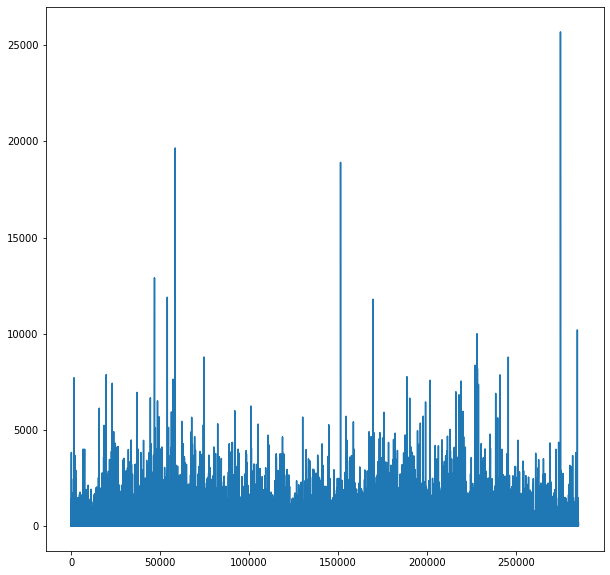

In [ ]:
df['Amount'].plot(subplots=True, figsize = (10, 10))

Единственный признак в которых могли быть аномальные данные - это размер денежного перевода, как видно из графика аномалий нет.

Посмотрим на корреляцию

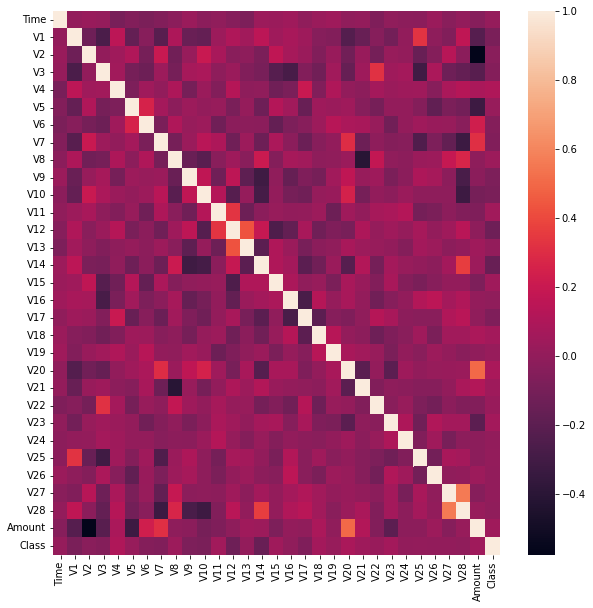

In [22]:
figure(figsize = (10, 10))
sns.heatmap(df[:1000].corr())

<Figure size 720x720 with 0 Axes>

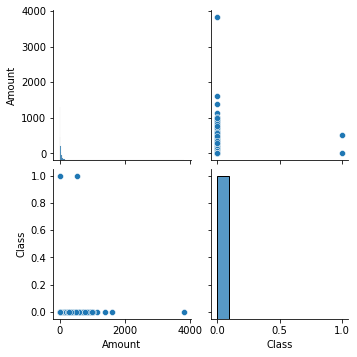

In [23]:
figure(figsize = (10, 10))
sns.pairplot(df[:1000][["Amount","Class"]])
plt.show()

C целью ничего не скоррелированно

In [24]:
df.drop(['Time'],axis=1,inplace=True)

Удалил колонку Time, потому что она никак не связана с целью, а привязана к первой транзакции

Приедение колонок к правильным типам, чтобы сократить размер таблицы

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     28

In [26]:
df["Class"]=df["Class"].astype(np.int32)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     28

Сократил размер данных

Создание тренировочных и тестовых данных

In [28]:
X=df.drop(columns=['Class'])
y=df['Class']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123, stratify=y)

In [30]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [31]:
np.mean(y_train),1-np.mean(y_train)

(0.0016653449643140364, 0.998334655035686)

In [32]:
np.mean(y_test),1-np.mean(y_test)

(0.0016741268107003137, 0.9983258731892997)

Данные подготовлены, они были разбиты на train/test с соблюдение меток класса

Первоначальное решение будет без аугментации

Решение с помощью SVM и LogisticRegression

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_pipe=Pipeline(steps=[("ss",StandardScaler()),("lr",LogisticRegression())])
logistic_pipe.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LogisticRegression())])

In [ ]:
y_hat=logistic_pipe.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.63      0.76        95

    accuracy                           1.00     56746
   macro avg       0.98      0.82      0.88     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print(metrics.confusion_matrix(y_test,y_hat))

[[56649     2]
 [   35    60]]


Как видно из решения алгоритм logistic regression без аугментации показал precision 0.97 это означает, что алгоритм хорошо отделяет мой класс от других классов, но низкая recall это говорит о том что он плохо находит именно мой класс или, по другому говоря, часто прогнозирует хорошую транзакцию,когда она мошеническая

Roc-curve не высчитывал так как эта метрика бесполезна при большом дисбалансе классов

Решение с помощью SVM без настройки параметров

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=2))
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=2, kernel='poly'))])

In [ ]:
y_hat=svm_pipe.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Как видно из результатов svc алгоритм показал результаты лучше чем Логистическая регрессия. На 1-ом классе recall лучше на 9%, f1 score на 6%, а  macro-avg на 3%

In [ ]:
print(metrics.confusion_matrix(y_test,y_hat))

[[56648     3]
 [   27    68]]


Решение с автоматической настройкой параметров

LogisticRegression c настройкой параметров

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_pipe=Pipeline(steps=[("ss",StandardScaler()),("poly",PolynomialFeatures()),("lr",LogisticRegression())])
params={
    "lr__penalty":['l2',"l1","elasticnet"],
    "lr__C":[0.9,1.0,1.1],
    "lr__class_weight":["balanced","None"],
    "poly__degree":[1,2]
}
gs_logic=GridSearchCV(logistic_pipe,params,n_jobs=-1,cv=5)

In [ ]:
gs_logic.fit(X_train,y_train)

In [ ]:
gs_logic.best_estimator_,gs_logic.best_params_,gs_logic.best_score_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('lr', LogisticRegression(class_weight='None'))]),
 {'lr__C': 1.0,
  'lr__class_weight': 'None',
  'lr__penalty': 'l2',
  'poly__degree': 2},
 0.9993259318001586)

In [ ]:
y_hat=gs_logic.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.78      0.87        95

    accuracy                           1.00     56746
   macro avg       0.99      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print(metrics.confusion_matrix(y_test,y_hat))

[[56649     2]
 [   21    74]]


После настройки параметров logistic regession показала самые лучшие результаты. По сравнению с svc на 1-ом классе recall лучше на 6%, f1-score на 5%, а macro avg на 2%

SVC c настройкой параметров

In [ ]:
svm_pipe=Pipeline(steps=[("ss",StandardScaler()),("svc",SVC())])
params={
    "svc__kernel":["poly","rbf"],
    "svc__degree":[2,3]
}
gs_svm=GridSearchCV(svm_pipe,params,n_jobs=-1,cv=5)

In [ ]:
gs_svm.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__degree': [2, 3], 'svc__kernel': ['poly', 'rbf']})

In [ ]:
gs_svm.best_estimator_,gs_svm.best_params_,gs_svm.best_score_

(Pipeline(steps=[('ss', StandardScaler()), ('svc', SVC(kernel='poly'))]),
 {'svc__degree': 3, 'svc__kernel': 'poly'},
 0.9994228566393515)

In [ ]:
y_hat=gs_svm.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.81      0.86        95

    accuracy                           1.00     56746
   macro avg       0.96      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print(metrics.confusion_matrix(y_test,y_hat))

[[56644     7]
 [   18    77]]


Как видно из результатво после настройки параметров svc показала высокий macro avg, такой же как и logistic regression. Recall лучше на 3%, а precision хуже на 6% по сравнению с logistic regression на 1-ом классе

Решение с аугментацией

Применим TomekLinks

In [ ]:
from imblearn.under_sampling import TomekLinks

Используем sampling_strategy="majority"

In [ ]:
tl=TomekLinks(sampling_strategy="majority")

In [ ]:
sum(y_train),len(y_train)- sum(y_train)

(378, 226602)

In [ ]:
X_train_augm_tl,y_train_augm_tl = tl.fit_resample(X_train,y_train)

In [ ]:
sum(y_train_augm_tl),len(y_train_augm_tl)- sum(y_train_augm_tl)

(378, 226579)

In [ ]:
svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=2))
svm_pipe.fit(X_train_augm_tl, y_train_augm_tl)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=2, kernel='poly'))])

In [ ]:
y_hat=svm_pipe.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.71      0.81        95

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



После применения к данным TomekLinks c sampling_strategy="majority" recall и f1-score уменьшилось на 1 %

Используем sampling_strategy="all"

In [ ]:
tl=TomekLinks(sampling_strategy="all")

In [ ]:
sum(y_train),len(y_train)- sum(y_train)

(378, 226602)

In [ ]:
X_train_augm_tl,y_train_augm_tl = tl.fit_resample(X_train,y_train)

In [ ]:
sum(y_train_augm_tl),len(y_train_augm_tl)- sum(y_train_augm_tl)

(355, 226579)

In [ ]:
svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=2))
svm_pipe.fit(X_train_augm_tl, y_train_augm_tl)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=2, kernel='poly'))])

In [ ]:
y_hat=svm_pipe.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



После применения к данным TomekLinks c sampling_strategy="all" recall и f1-score увеличилось на один процесс на 1 % по сравнению с TomekLinks c sampling_strategy="majority"

Воспользуемся Logistic Regresion для предсказаний данных после применения  Tomeklinks.

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_pipe=Pipeline(steps=[("ss",StandardScaler()),("poly",PolynomialFeatures()),("lr",LogisticRegression())])
params={
    "lr__penalty":['l2'],
    "lr__C":[1.0],
    "lr__class_weight":["None"],
    "poly__degree":[2]
}
gs_logic=GridSearchCV(logistic_pipe,params,n_jobs=-1,cv=5)
gs_logic.fit(X_train_augm_tl,y_train_augm_tl)

In [ ]:
gs_logic.best_estimator_,gs_logic.best_params_,gs_logic.best_score_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('lr', LogisticRegression(class_weight='None'))]),
 {'lr__C': 1.0,
  'lr__class_weight': 'None',
  'lr__penalty': 'l2',
  'poly__degree': 2},
 0.9994756192190204)

In [ ]:
y_hat=gs_logic.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.79      0.86        95

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print(metrics.confusion_matrix(y_test,y_hat))

[[56646     5]
 [   20    75]]


Как видно из результатов recall поднялся на 1%, precision упал на 3%, а macro avg не изменилось

Воспользуемся SVC для предсказаний данных после применения  Tomeklinks.

In [ ]:
svm_pipe=Pipeline(steps=[("ss",StandardScaler()),("svc",SVC())])
params={
    "svc__kernel":["poly"],
    "svc__degree":[2,3]
}
gs_svm=GridSearchCV(svm_pipe,params,n_jobs=-1,cv=5)

In [ ]:
gs_svm.fit(X_train_augm_tl,y_train_augm_tl)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__degree': [2, 3], 'svc__kernel': ['poly']})

In [ ]:
gs_svm.best_estimator_,gs_svm.best_params_,gs_svm.best_score_

(Pipeline(steps=[('ss', StandardScaler()), ('svc', SVC(kernel='poly'))]),
 {'svc__degree': 3, 'svc__kernel': 'poly'},
 0.9995373105044857)

In [ ]:
y_hat=gs_svm.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.81      0.87        95

    accuracy                           1.00     56746
   macro avg       0.98      0.91      0.94     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print(metrics.confusion_matrix(y_test,y_hat))

[[56647     4]
 [   18    77]]


Как видно из результатов, благодаря TomekLinks macro avg увеличилось на 1%. Алгоритм показал самые лучшие результаты.

Применим ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
sum(y_train),len(y_train)- sum(y_train)

(378, 226602)

In [ ]:
ad=ADASYN()
X_train_augm_ad,y_train_augm_ad=ad.fit_resample(X_train,y_train)

In [ ]:
svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=2))
svm_pipe.fit(X_train_augm_ad, y_train_augm_ad)

In [ ]:
y_hat=svm_pipe.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.81      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.90      0.55     56746
weighted avg       1.00      0.98      0.99     56746



Как видно из результатов recall вырасло, но precision упало практически до нуля, из этого я могу сделать вывод, что если в даннных наблюдается очень сильный дисбаланс, как в нашем случае, то лучше ADASYN не использовать

<h3>Вывод</h3><br>
<h5>После проделанной работы, я могу заключить, что Logistic Regression и SVC  хорошо справилися с задачей классификации на несбалансированнных данных: macro avg у них 93%. После применения к тренировочным данных алгоритма under sampling(TomekLinks) в связке с svc ,были получены наилучшие результаты: macro avg стал 94%. После применения к тренировочным данных алгоритма over sampling(ADASYN) алгоритм показал на тестовых данных худшие результаты, поэтому при большом дисбалансе наверное лучше его не использовать.</h5>